#### Markowitz Modern Portfolio Theory is a practical method that allows us to build a portfolio that maximizes returns while maintaining a reasonable level of risk. <br>

#### The key component of this theory is diversification. It explains that by investing in stocks that are uncorrelated, we can lower the overall risk of a portfolio while maximizing returns for that level of risk. <br>

#### in MPT, the risk and return of an investment is not viewed individually, but by how it affects the risk and return of the entire portfolio.


#### This project uses Markowitz's Theory to create an efficient portfolio using only technology stocks from the S&P 500 index.

#### Libraries used in project



In [ ]:
#import necessary libraries
import os
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import yfinance as yfin
import matplotlib.pyplot as plt

### Functions

Creating all the functions that will be used over the course of this project

In [ ]:
def get_dataframe_from_webpage(url, index):
    """
    desc: parses a webpage table into a dataframe
    params: webpage url, table index
    returns: dataframe of downloaded table
    """
    data = pd.read_html(url)[index]

    return data


In [ ]:
def dataframe_by_column_category(df, column_name, column_category):
    """
    desc: gets a slice of a dataframe by specifying a column category
    params: dataframe to be sliced, column name, column category
    returns: sliced dataframe
    """
    sliced_df = df.loc[df[ column_name ] == column_category]
    return sliced_df

In [ ]:
def get_items_from_dataframe_column(df, column_name):
    """
    desc: gets the row items of a dataframe column and saves them in a list
    params: dataframe, column name
    returns: row items of a dataframe column
    rtype: list
    """
    return df[column_name].to_list()

In [ ]:
def csv_from_yahoo_data(file_path, ticker, s_year, s_month, s_day, e_year, e_month, e_day):
    """
    desc: downloads company stock data for a specific period from yahoo finance and saves it as csv
    params: folder to dave data, company ticker, period start date, period end date
    returns: saved data as csv file
    rtype: .csv
    """
    start_date = dt.datetime(s_year, s_month, s_day)
    end_date = dt.datetime(e_year, s_month, s_day)

    try:
        print(f"downloading data for company:{ticker}")
        stock_data = yfin.download(ticker, start_date, end_date)

        stock_data.to_csv(file_path + ticker + ".csv")

    except Exception as e:
        print(f"Failed to download stock data for {ticker}")

    else:
        return stock_data

In [ ]:
def multiple_csv_from_yahoo_data(file_path, s_year, s_month, s_day, e_year, e_month, e_day, tickers):
    """
    desc: download and save multiple stock data from yahoo finance to csv
    params: list of tickers, period start date, period end date
    """
    for ticker in tickers:
        csv_from_yahoo_data(file_path, ticker, s_year, s_month, s_day, e_year, e_month, e_day)

In [ ]:
def count_csv_in_folder(file_path):
    """
    desc: returns the number of csv files present in a path
    params: folder path
    returns: count of csv files
    rtype: int
    """
    files = [file for file in os.listdir(file_path) if file.endswith(".csv")]
    return len(files)

In [ ]:
def df_from_csv(ticker):
    """
    desc:  creates dataframe from a csv file
    params: csv file path
    returns: pandas dataframe
    """
    df = pd.read_csv(file_path + ticker + ".csv", index_col='Date', parse_dates=True)
    return df


In [ ]:
def merge_df_by_column(column_name, tickers):
    """
    desc: merges multiple dataframes by column
    params: column to merge by, tickers for each df
    returns: merged dataframe
    rtype: pandas dataframe
    """
    merged_df = pd.DataFrame()

    for ticker in tickers:
        df = df_from_csv(ticker)
        merged_df[ticker] = df[column_name]

    return merged_df

In [ ]:
def get_returns_from_df(df):
    """
    desc: calculates returns (relative change in price) for all columns in a dataframe
    params: dataframe
    returns returns dataframe
    rtype: pandas dataframe
    """
    returns = df.pct_change()
    return returns

In [ ]:
def get_roi(df):
    """
    desc: get return on investment (roi) for dataframe
    params: dataframe
    returns: roi value
    rtype: float
    """
    start = df.loc[df.index[0]]['Adj Close']
    end = df.loc[df.index[-1]]['Adj Close']

    roi = (end - start) / start

    return roi


In [ ]:
def get_roi_for_multiple_stocks(tickers):
    """
    desc: create dataframe of rois for all stocks by their tickers
    params: tickers list
    returns: dataframe of rois
    rtype: pandas dataframe
    """
    tickers_list = []
    rois = []

    for ticker in tickers:
        df = df_from_csv(ticker)
        roi = get_roi(df)
        rois.append(roi)
    return pd.DataFrame({'Ticker':tickers, 'ROI':rois})

### Data Preparation


Download and save the data containing the list of all S&P 500 companies

In [ ]:
#specify url to get the list of all companies  in s&p 500
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

#download the list of comapnies and save it in a variable called s_p_df
s_p_df = get_dataframe_from_webpage(url, 0)

s_p_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


#### Filter Technology Companies

The technology companies are labeled as "Information Technology" in the "GICS Sector" column. <br>
We are only interested in these companies so we filter them out by this label

In [ ]:
#Filter and save the list technology companies
tech = dataframe_by_column_category(s_p_df, "GICS Sector", "Information Technology" )


#### Download stock data for tech companies
Download stock data for each of the companies and save them as csv files. We will be using data between January 2021 and January 2023 for our analysis (2 years worh of data)

In [ ]:
#get the symbol for each company and save it in a list
tech_tickers = get_items_from_dataframe_column(tech, 'Symbol')
print(f"Company Symbols: {tech_tickers})")

#save the count of symbols
num_of_tickers = len(tech_tickers)

#specify file_path to store csv files
file_path = "/content/drive/MyDrive/Data_Science/Projects/MPT/Stock_Files/"

#download two years worth of data for each company
multiple_csv_from_yahoo_data(file_path, 2021, 1, 1, 2023, 1, 1, tech_tickers)

#print the number of csv files downloaded
num_of_files = count_csv_in_folder(file_path)

# compare the number of symbols with length of files downloaded
print(f"number of symbols = number of files: {num_of_tickers == num_of_files}")

Company Symbols: ['ACN', 'ADBE', 'AKAM', 'AMD', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'AVGO', 'CDNS', 'CDW', 'CDAY', 'CSCO', 'CTSH', 'GLW', 'DXC', 'ENPH', 'EPAM', 'FFIV', 'FICO', 'FSLR', 'FTNT', 'IT', 'GEN', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MCHP', 'MU', 'MSFT', 'MPWR', 'MSI', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PAYC', 'PTC', 'QRVO', 'QCOM', 'ROP', 'CRM', 'STX', 'NOW', 'SWKS', 'SEDG', 'SNPS', 'TEL', 'TDY', 'TER', 'TXN', 'TRMB', 'TYL', 'VRSN', 'WDC', 'ZBRA'])
downloading data for company:ACN
[*********************100%%**********************]  1 of 1 completed
downloading data for company:ADBE
[*********************100%%**********************]  1 of 1 completed
downloading data for company:AKAM
[*********************100%%**********************]  1 of 1 completed
downloading data for company:AMD
[*********************100%%**********************]  1 of 1 completed
downloading data for company:APH
[*********************100%%****

#### Create DataFrames

Example dataframe using data from the first company in our list


In [ ]:
#Company name
print("Company Symbol: ", tech_tickers[0])
print()

#dataframe using company data
df_from_csv(tech_tickers[0]).head()

Company Symbol:  ACN



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,261.000000,261.660004,254.050003,256.459991,247.030975,2505100
2021-01-05,256.399994,258.640015,255.139999,257.920013,248.437332,1809200
2021-01-06,259.200012,263.589996,256.950012,260.739990,251.153641,2535600
2021-01-07,260.359985,264.920013,260.339996,263.200012,253.523132,2068200
2021-01-08,263.809998,266.529999,261.290009,264.160004,254.447861,2010700


Now we have data for all our companies. We have to merge the data into one dataframe to be used for our analysis. <p>
 We merge the dataframes on the "Adj close" (Adjusted close) column which is an accurate indicator of the stock value at the end of each day

In [ ]:
#merge dataframes by Adjusted close price
merged_df = merge_df_by_column('Adj Close', tech_tickers)

#print first 5 rows of merged dataframe
merged_df.head()

,ACN,ADBE,AKAM,AMD,APH,ADI,ANSS,AAPL,AMAT,ANET,...,SNPS,TEL,TDY,TER,TXN,TRMB,TYL,VRSN,WDC,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,247.030975,485.339996,105.239998,92.300003,62.649925,138.974472,357.670013,127.331673,84.861465,70.790001,...,254.699997,115.120789,362.390015,117.936989,150.813828,66.290001,431.609985,213.580002,52.230000,378.130005
2021-01-05,248.437332,485.690002,105.419998,92.769997,63.732117,141.458557,359.829987,128.905991,87.528320,71.502502,...,258.890015,117.331337,375.489990,120.212791,151.920151,66.849998,432.239990,206.500000,53.060001,380.570007
2021-01-06,251.153641,466.309998,101.529999,90.330002,65.316414,142.096222,349.899994,124.566811,88.729889,71.467499,...,249.699997,120.699783,368.890015,121.123131,152.673203,68.410004,433.730011,199.509995,53.410000,394.820007
2021-01-07,253.523132,477.739990,102.809998,95.160004,66.252342,148.101761,365.019989,128.817429,92.373642,73.992500,...,258.839996,123.120865,356.170013,128.544296,156.131638,71.839996,437.670013,200.000000,54.740002,409.100006
2021-01-08,254.447861,485.100006,103.459999,94.580002,65.984238,149.177246,374.660004,129.929291,93.350510,76.529999,...,262.799988,124.852913,368.329987,130.760727,159.125229,72.320000,436.390015,202.440002,51.820000,405.470001


#### Create Portfolio

From our analysis so far, we have 67 stocks in our dataframe, to create an efficient portfolio, we decide to use the top 20 performing stocks for our portfolio. We do this by calculating the return on investments for every stock and use the top 20 for our portfolio

In [ ]:
#get return on investment for all stocks in dataframe
roi_df = get_roi_for_multiple_stocks(tech_tickers)
print("first 5 rows of roi dataframe\n", roi_df.head(), "\n")

#get top 20 companies with highest return on investment
top_roi = roi_df.sort_values(by='ROI', ascending=False)[:20]
print("top 20 roi\n", top_roi, "\n")

#get tickers for top 20 companies
top_tickers = get_items_from_dataframe_column(top_roi, 'Ticker')

#create our portfolio dataframe by taking top 20 stocks from merged dataframe
port_df= pd.DataFrame()
for ticker in top_tickers:
    port_df[ticker] = merged_df[ticker]

print("dataframe of top 20 performing stocks\n")
port_df.head()

first 5 rows of roi dataframe
   Ticker       ROI
0    ACN  0.067705
1   ADBE -0.306610
2   AKAM -0.198974
3    AMD -0.298267
4    APH  0.208892 

top 20 roi
    Ticker       ROI
25     IT  1.126526
44     ON  0.909091
9    ANET  0.714225
24   FTNT  0.679376
40    MSI  0.581103
19   ENPH  0.538319
32   JNPR  0.494879
34   KLAC  0.484144
23   FSLR  0.479554
27    HPE  0.470158
13    CDW  0.434787
11   AVGO  0.397511
45   ORCL  0.324543
29    IBM  0.310813
33   KEYS  0.304086
57   SNPS  0.253593
4     APH  0.208892
46   PANW  0.190411
22   FICO  0.184697
12   CDNS  0.183265 

dataframe of top 20 performing stocks



,IT,ON,ANET,FTNT,MSI,ENPH,JNPR,KLAC,FSLR,HPE,CDW,AVGO,ORCL,IBM,KEYS,SNPS,APH,PANW,FICO,CDNS
Date,,,,,,,,,,,,,,,,,,,,
2021-01-04,158.070007,32.669998,70.790001,29.112,161.934006,172.240005,20.912638,251.684143,101.239998,10.684711,123.318031,395.125854,61.010807,103.558601,131.179993,254.699997,62.649925,117.220001,505.260010,135.759995
2021-01-05,159.710007,33.220001,71.502502,28.348,161.073563,181.479996,21.606327,256.962830,92.160004,10.878641,123.977455,397.802032,60.254753,105.396843,133.839996,258.890015,63.732117,116.716667,505.010010,136.139999
2021-01-06,163.789993,34.060001,71.467499,27.622,165.008301,203.380005,21.809814,256.402100,99.690002,11.118748,125.005432,395.348846,60.110653,108.028809,136.110001,249.699997,65.316414,115.093330,497.010010,130.639999
2021-01-07,166.199997,35.360001,73.992500,28.650,165.395020,213.759995,22.041048,268.951050,105.500000,11.054104,127.982681,412.009949,60.590996,107.778145,141.000000,258.839996,66.252342,121.036667,490.109985,137.050003
2021-01-08,169.100006,35.520000,76.529999,29.628,168.749695,207.410004,22.013296,273.775238,104.099998,10.970989,130.523514,414.100708,60.888813,107.393806,146.800003,262.799988,65.984238,122.183334,500.359985,136.190002


### Returns

Now we calculate returns for all stocks in our portfolio. Returns tells us how the price changes over the time frame of the dataset, and we can use the information presented for further analysis to build our portfolio

In [ ]:
#get returns for our merged dataframe
returns = get_returns_from_df(port_df)

#print top 5 rows of returns dataframe
returns.head()

,IT,ON,ANET,FTNT,MSI,ENPH,JNPR,KLAC,FSLR,HPE,CDW,AVGO,ORCL,IBM,KEYS,SNPS,APH,PANW,FICO,CDNS
Date,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.010375,0.016835,0.010065,-0.026243,-0.005314,0.053646,0.033171,0.020973,-0.089688,0.018150,0.005347,0.006773,-0.012392,0.017751,0.020278,0.016451,0.017274,-0.004294,-0.000495,0.002799
2021-01-06,0.025546,0.025286,-0.000490,-0.025610,0.024428,0.120675,0.009418,-0.002182,0.081706,0.022071,0.008292,-0.006167,-0.002392,0.024972,0.016961,-0.035498,0.024859,-0.013908,-0.015841,-0.040400
2021-01-07,0.014714,0.038168,0.035331,0.037217,0.002344,0.051037,0.010602,0.048942,0.058281,-0.005814,0.023817,0.042143,0.007991,-0.002320,0.035927,0.036604,0.014329,0.051639,-0.013883,0.049066
2021-01-08,0.017449,0.004525,0.034294,0.034136,0.020283,-0.029706,-0.001259,0.017937,-0.013270,-0.007519,0.019853,0.005075,0.004915,-0.003566,0.041135,0.015299,-0.004047,0.009474,0.020914,-0.006275


### Statistical Measures



first we specify the average number of trading days in a year. This will be used in further calculations

In [ ]:
avg_trading_days = 252

#### Correlation

We check the correlation between all the stocks in the dataframe. By using the top 20 stocks, we are able to diversify our portfolio to an extent as shown by the correlation values in the dataframe

In [ ]:
returns.corr()

,IT,ON,ANET,FTNT,MSI,ENPH,JNPR,KLAC,FSLR,HPE,CDW,AVGO,ORCL,IBM,KEYS,SNPS,APH,PANW,FICO,CDNS
IT,1.000000,0.507526,0.501833,0.534051,0.546312,0.346551,0.447567,0.494788,0.304434,0.376916,0.591978,0.506849,0.442764,0.235553,0.583266,0.558231,0.640401,0.410508,0.404581,0.549488
ON,0.507526,1.000000,0.584539,0.551632,0.503933,0.501547,0.501497,0.807727,0.407662,0.494168,0.645829,0.769286,0.326813,0.251932,0.703576,0.642735,0.729244,0.455288,0.444663,0.637630
ANET,0.501833,0.584539,1.000000,0.556903,0.605328,0.410318,0.564615,0.623663,0.328379,0.401564,0.547847,0.650968,0.374590,0.231802,0.636663,0.607644,0.655872,0.478658,0.390135,0.613227
FTNT,0.534051,0.551632,0.556903,1.000000,0.548364,0.424467,0.460576,0.560649,0.258412,0.315645,0.568575,0.603893,0.416922,0.173503,0.602741,0.671827,0.595098,0.659849,0.495653,0.645362
MSI,0.546312,0.503933,0.605328,0.548364,1.000000,0.387805,0.569439,0.525027,0.313888,0.397689,0.648824,0.565703,0.497069,0.311319,0.624270,0.588691,0.675667,0.395662,0.383049,0.573312
ENPH,0.346551,0.501547,0.410318,0.424467,0.387805,1.000000,0.297333,0.512505,0.670184,0.174659,0.373389,0.450733,0.143747,0.036121,0.480802,0.522429,0.452612,0.444090,0.365873,0.498453
JNPR,0.447567,0.501497,0.564615,0.460576,0.569439,0.297333,1.000000,0.501291,0.262652,0.575298,0.587998,0.542811,0.465544,0.410475,0.643971,0.426556,0.579670,0.349407,0.377124,0.423274
KLAC,0.494788,0.807727,0.623663,0.560649,0.525027,0.512505,0.501291,1.000000,0.450386,0.469209,0.634092,0.792924,0.328021,0.276402,0.733392,0.727433,0.740753,0.446774,0.462159,0.705991
FSLR,0.304434,0.407662,0.328379,0.258412,0.313888,0.670184,0.262652,0.450386,1.000000,0.222436,0.331951,0.395388,0.127538,0.080041,0.416659,0.400545,0.404998,0.263755,0.284152,0.399375
HPE,0.376916,0.494168,0.401564,0.315645,0.397689,0.174659,0.575298,0.469209,0.222436,1.000000,0.582469,0.474344,0.366840,0.460207,0.519203,0.318987,0.565653,0.179064,0.307003,0.317103


#### Covariance of Portfolio over a trading year
Covariance tells us the total variation between all the stocks in our portfolio

In [ ]:
avg_trading_days * returns.cov()

,IT,ON,ANET,FTNT,MSI,ENPH,JNPR,KLAC,FSLR,HPE,CDW,AVGO,ORCL,IBM,KEYS,SNPS,APH,PANW,FICO,CDNS
IT,0.113724,0.092648,0.065605,0.082877,0.047146,0.081937,0.042342,0.075206,0.049978,0.040253,0.055849,0.056709,0.044646,0.018543,0.056857,0.069957,0.055324,0.058475,0.057344,0.068832
ON,0.092648,0.293027,0.122665,0.137414,0.069808,0.190350,0.076157,0.197073,0.107428,0.084715,0.097804,0.138162,0.052897,0.031835,0.110092,0.129294,0.101127,0.104104,0.101167,0.128212
ANET,0.065605,0.122665,0.150282,0.099348,0.060052,0.111522,0.061403,0.108971,0.061972,0.049299,0.059415,0.083726,0.043420,0.020976,0.071343,0.087537,0.065134,0.078380,0.063566,0.088304
FTNT,0.082877,0.137414,0.099348,0.211765,0.064577,0.136949,0.059459,0.116286,0.057890,0.046000,0.073198,0.092201,0.057367,0.018638,0.080177,0.114888,0.070154,0.128262,0.095865,0.110316
MSI,0.047146,0.069808,0.060052,0.064577,0.065488,0.069580,0.040880,0.060558,0.039104,0.032230,0.046451,0.048030,0.038035,0.018597,0.046179,0.055983,0.044295,0.042769,0.041199,0.054498
ENPH,0.081937,0.190350,0.111522,0.136949,0.069580,0.491559,0.058481,0.161955,0.228742,0.038780,0.073238,0.104847,0.030135,0.005912,0.097442,0.136115,0.081293,0.131518,0.107813,0.129813
JNPR,0.042342,0.076157,0.061403,0.059459,0.040880,0.058481,0.078699,0.063385,0.035870,0.051111,0.046147,0.050522,0.039051,0.026880,0.052221,0.044469,0.041659,0.041404,0.044466,0.044108
KLAC,0.075206,0.197073,0.108971,0.116286,0.060558,0.161955,0.063385,0.203151,0.098823,0.066975,0.079955,0.118574,0.044207,0.029081,0.095551,0.121841,0.085531,0.085060,0.087550,0.118199
FSLR,0.049978,0.107428,0.061972,0.057890,0.039104,0.228742,0.035870,0.098823,0.236989,0.034293,0.045209,0.063861,0.018565,0.009096,0.058632,0.072461,0.050507,0.054236,0.058139,0.072219
HPE,0.040253,0.084715,0.049299,0.046000,0.032230,0.038780,0.051111,0.066975,0.034293,0.100292,0.051605,0.049840,0.034737,0.034021,0.047529,0.037540,0.045890,0.023954,0.040863,0.037303


#### Generate weights

Now we generate random weights for the stocks in our portfolio. The weight of a stock simply means how much of that stock we should have in our portfolio to achieve peak efficiency. The weights of all stocks when summed up, must equal 1, or 100%.

In [ ]:
# Generate 20 random numbers to represent 20 stocks in portfolio
weights = np.random.random(20)

#sum up all weights to 1
weights /= np.sum(weights)
print('weights :', weights, "\n")
print('sum of weights :', (int(np.sum(weights))))

weights : [0.05893533 0.05787543 0.0469912  0.02828639 0.08028178 0.0040074
 0.05954107 0.08672935 0.00640262 0.04717782 0.04274612 0.04932508
 0.05433774 0.06660246 0.08981548 0.01827109 0.08352996 0.04178948
 0.0451904  0.03216381] 

sum of weights : 0


#### Portfolio Return

Now we calculate total return of our portfolio over a year of trading. <br>

Portfolio return is expressed as the total sum of the product of each stock's weight and it's return. Given by:
 $(w_1r_1 + w_2r_2) = r_p$

 where:<br>
 $w_1$ = weight of stock 1

 $w_2$ = weight of stock 2

 $r_1$ = risk of stock 1

 $r_2$ = risk of stock 2






In [ ]:
# calculateide return of portfolio using random weights over the whole dataset
port_return = np.sum(weights * returns.mean()) * avg_trading_days
print("Total return of portfolio:", port_return)

Total return of portfolio: 0.24715847189912712


#### Portfolio Risk

The risk of the portfolio is simply the standard deviation of that portfolio. It can be expressed as the  sum of the squared product of the weights and standard deviations of each stock in the portfolio. Given by:

$(w_1\sigma_1 + w_2\sigma_2)^2 = w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_1 + w_2^2\sigma_2^2$

In [ ]:
#Portfolio Risk
port_risk = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

print("Total risk of portfolio:", port_risk)

Total risk of portfolio: 0.25421393101679124


#### Efficient Frontier (E.F) and Sharpe Ratio (S.R)

The efficient frontier is an upward sloping curve that indicates the combination of investments that will provide the highest level of return for the lowest level of risk. It is expressed by plotting risk against returns of each combination of investments <br><br>

The sharpe ratio helps to find the best combination of investments that gives the best return at the minimum risk.

*Sharpe Ratio* = $\frac{r_i - r_f}{\sigma_i}$

where: <br>
$r_f = $ Risk Free Rate

$r_i = $ Rate of Return of the stock

$\sigma_i = $ Standard Deviation of the Stock

For our E.F, we will be using 5000 combinations of our portfolio.

First we calculate the returns and risks for all the portfolios, then we can calculate our sharpe ratio, and also plot our Efficent Frontier.

In [ ]:
#Analysing Return and Risk for 5000 combinations of Portfolios

#list to save returns of each portfolio
port_returns  = []

#list to save risks of each portfolio
port_risks = []

#list to save sharpe ratio of each portfolio
port_SR = []

#list to save weights of stocks in each portfolio
port_wts = []

#risk free rate as at 2021
risk_free_rate = 0.108

for x in range(5000):
    # Generate random weights for all portfolio combinations
    p_weights = np.random.random(20)
    p_weights /= np.sum(p_weights)

    # calculate returns of each portfolio and save in returns list
    ret = np.sum(p_weights * returns.mean()) * 252
    port_returns.append(ret)

    # calculate risk of each portfolio and save in risks list
    risk = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    port_risks.append(risk)

    # calculate sharpe ratio of each portfolio and save in risks list
    SR = (ret - risk_free_rate) / risk
    port_SR.append(SR)

    # save the weights for each portfolio
    port_wts.append(p_weights)

# Convert to Numpy arrays
port_returns = np.array(port_returns)
port_risks = np.array(port_risks)
port_SR = np.array(port_SR)
port_wts = np.array(port_wts)

print(f"returns: {port_returns} \n\n risks: {port_risks} \n\n sharpe ratios: {port_SR} \n\n weights: {port_wts}")

returns: [0.26463956 0.25377919 0.2926794  ... 0.27677209 0.23875184 0.23322172] 

 risks: [0.25625183 0.26786817 0.27821532 ... 0.27178543 0.25878922 0.25244552] 

 sharpe ratios: [0.61127196 0.54421992 0.66380023 ... 0.62097549 0.50524453 0.49603464] 

 weights: [[0.10349952 0.06090483 0.04400405 ... 0.10384576 0.04819477 0.01786586]
 [0.01712236 0.07137144 0.06958069 ... 0.02440982 0.08044271 0.03292957]
 [0.10230054 0.1044462  0.04820187 ... 0.04358073 0.03292244 0.0397456 ]
 ...
 [0.06352839 0.11201885 0.06924698 ... 0.01721552 0.06230376 0.05675235]
 [0.01112668 0.01133402 0.08768677 ... 0.05289205 0.03620189 0.08769653]
 [0.01538844 0.02958349 0.00209421 ... 0.09489821 0.06357402 0.02151232]]


We create a dataframe of the risks and returns of our portfolio combinations to be used to plot our Efficient Frontier

<Axes: xlabel='Risk', ylabel='Return'>

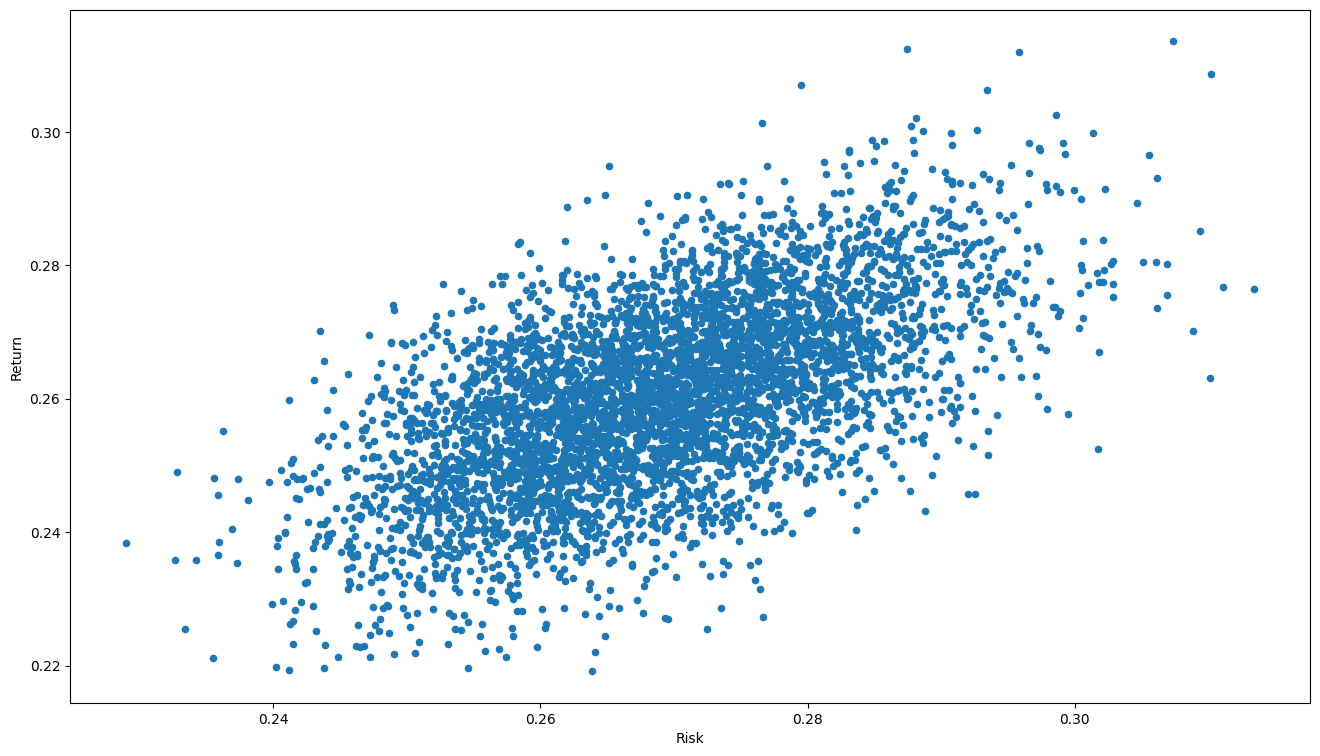

In [ ]:
# Create a dataframe with returns and risk
ports = pd.DataFrame()
ports['Return'] = port_returns

ports['Risk'] = port_risks

ports.plot(x='Risk', y='Return', kind='scatter', figsize=(16, 9))

#### The Most efficient Portfolio

The most efficient portfolio is the one with the highest sharpe ratio

In [ ]:
# get the index of the largest Sharpe Ratio
best_sr_idx = np.argmax(port_SR)

# Find the ideal weights of the stocks at best index
i = 0
len_stocks = 20

print("Percentage of each stock to buy:\n")
while i < len_stocks:
    print(f" {top_tickers[i]}: {np.round(port_wts[best_sr_idx][i] * 100, 2)}")
    i += 1

# Find the risk of that portfolio
print("\nRisk of most efficient portfolio:", port_risks[best_sr_idx])

# Find return of that portfolio
print("\nReturn of most efficient portfolio :", np.round(port_returns[best_sr_idx], 2))


Percentage of each stock to buy:

 IT: 8.95
 ON: 8.22
 ANET: 8.19
 FTNT: 8.81
 MSI: 4.98
 ENPH: 7.71
 JNPR: 5.78
 KLAC: 0.16
 FSLR: 8.75
 HPE: 5.8
 CDW: 4.28
 AVGO: 10.28
 ORCL: 8.57
 IBM: 1.37
 KEYS: 0.93
 SNPS: 0.23
 APH: 0.13
 PANW: 2.38
 FICO: 3.67
 CDNS: 0.8

Risk of most efficient portfolio: 0.2794711050812248

Return of most efficient portfolio : 0.31


Using the efficient frontier and the sharpe ratio , we have created an efficient portfolio, evaluating the risk and returns of our portfolio